In [680]:
import pandas as pd # to use or generate dataframe
import seaborn as sns # for pretty plots
import numpy as np # for matrix manipulation
import matplotlib.pyplot as plt

In [682]:
pwd

'C:\\Users\\emper\\OneDrive\\Desktop\\DSTI\\Pratical-Intro-to-Data-Science\\Final-Project'

In [684]:
%cd C:\\Users\\emper\\OneDrive\\Desktop\\DSTI\\Pratical-Intro-to-Data-Science\\Final-Project

C:\Users\emper\OneDrive\Desktop\DSTI\Pratical-Intro-to-Data-Science\Final-Project


**Let's Start by Uploading the File for the Weather Station Data**

In [687]:
pwd

'C:\\Users\\emper\\OneDrive\\Desktop\\DSTI\\Pratical-Intro-to-Data-Science\\Final-Project'

In [690]:
weather_station = pd.read_csv("WS_Master_Data_with_Long_and_Lat_P.csv")

In [692]:
weather_station.head(100)

,year,month,tmax,tmin,af,rain,sun,station,Lat,Lon,Sun_Data_Source
0,1941,Jan,NaN,NaN,NaN,74.7,NaN,aberporth,-4.57,52.14,Missing
1,1941,Feb,NaN,NaN,NaN,69.1,NaN,aberporth,-4.57,52.14,Missing
2,1941,Mar,NaN,NaN,NaN,76.2,NaN,aberporth,-4.57,52.14,Missing
3,1941,Apr,NaN,NaN,NaN,33.7,NaN,aberporth,-4.57,52.14,Missing
4,1941,May,NaN,NaN,NaN,51.3,NaN,aberporth,-4.57,52.14,Missing
...,...,...,...,...,...,...,...,...,...,...,...
95,1948,Dec,8.5,4.2,NaN,175.9,87.2,aberporth,-4.57,52.14,Campbell Stokes
96,1949,Jan,8.6,5.0,NaN,44.0,60,aberporth,-4.57,52.14,Campbell Stokes
97,1949,Feb,8.7,4.4,NaN,36.6,105,aberporth,-4.57,52.14,Campbell Stokes
98,1949,Mar,8.7,3.3,NaN,44.4,158.8,aberporth,-4.57,52.14,Campbell Stokes


**Let's have a general overview of the data**

In [695]:
weather_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39183 entries, 0 to 39182
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             39183 non-null  int64  
 1   month            39183 non-null  object 
 2   tmax             38257 non-null  float64
 3   tmin             38283 non-null  float64
 4   af               36858 non-null  float64
 5   rain             38312 non-null  float64
 6   sun              30145 non-null  object 
 7   station          39183 non-null  object 
 8   Lat              39183 non-null  float64
 9   Lon              39183 non-null  float64
 10  Sun_Data_Source  39183 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 3.3+ MB


In [697]:
#let's check the missing values
weather_station.isna().sum()

year                  0
month                 0
tmax                926
tmin                900
af                 2325
rain                871
sun                9038
station               0
Lat                   0
Lon                   0
Sun_Data_Source       0
dtype: int64

In [699]:
#The sun has object datatype instead of float64. Let's change this to give us appropraite summary statistics
weather_station['sun'] = pd.to_numeric(weather_station['sun'], errors= 'coerce')

In [701]:
weather_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39183 entries, 0 to 39182
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             39183 non-null  int64  
 1   month            39183 non-null  object 
 2   tmax             38257 non-null  float64
 3   tmin             38283 non-null  float64
 4   af               36858 non-null  float64
 5   rain             38312 non-null  float64
 6   sun              29863 non-null  float64
 7   station          39183 non-null  object 
 8   Lat              39183 non-null  float64
 9   Lon              39183 non-null  float64
 10  Sun_Data_Source  39183 non-null  object 
dtypes: float64(7), int64(1), object(3)
memory usage: 3.3+ MB


**Now, Let's Do Some EDA Using Summary Statistics and Basic Plottings**

In [704]:
weather_station.describe()

,year,tmax,tmin,af,rain,sun,Lat,Lon
count,39183.000000,38257.000000,38283.000000,36858.000000,38312.000000,29863.000000,39183.000000,39183.000000
mean,1971.025343,12.795598,5.979855,3.465001,73.224726,118.619958,-2.731420,53.951912
std,37.416310,5.050209,4.071049,5.166027,48.528718,63.393218,2.215758,2.506126
min,1853.000000,-0.900000,-8.600000,0.000000,0.000000,2.800000,-6.880000,50.218000
25%,1951.000000,8.600000,2.700000,0.000000,39.200000,64.700000,-4.430000,51.761000
50%,1978.000000,12.400000,5.600000,1.000000,62.800000,112.000000,-2.640000,53.381000
75%,2000.000000,16.900000,9.500000,5.000000,95.500000,163.900000,-1.260000,55.312000
max,2023.000000,28.300000,17.000000,31.000000,568.800000,350.300000,1.727000,60.139000


**Let's look at the trend over years and months**

<Axes: title={'center': 'Tmax Trend Over Time in Years'}, xlabel='year'>

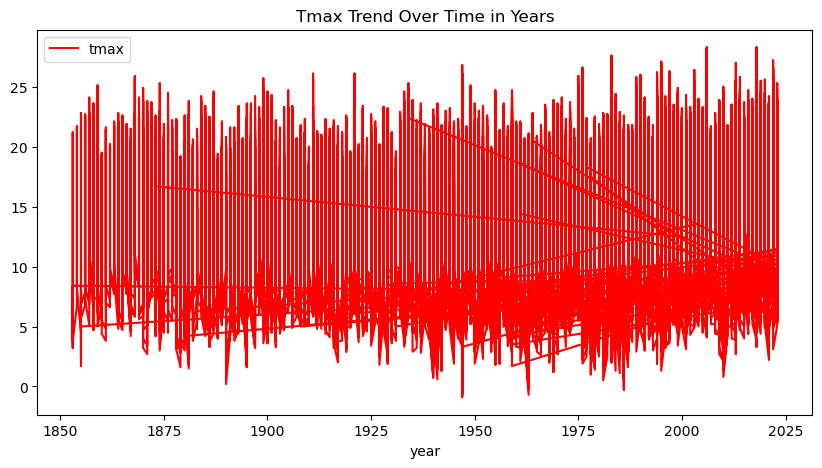

In [807]:
weather_station.plot(x ='year', y = 'tmax', figsize=(10, 5), title= 'Tmax Trend Over Time in Years', color='red')

<Axes: title={'center': 'Sun Trend Over Time in Years'}, xlabel='year'>

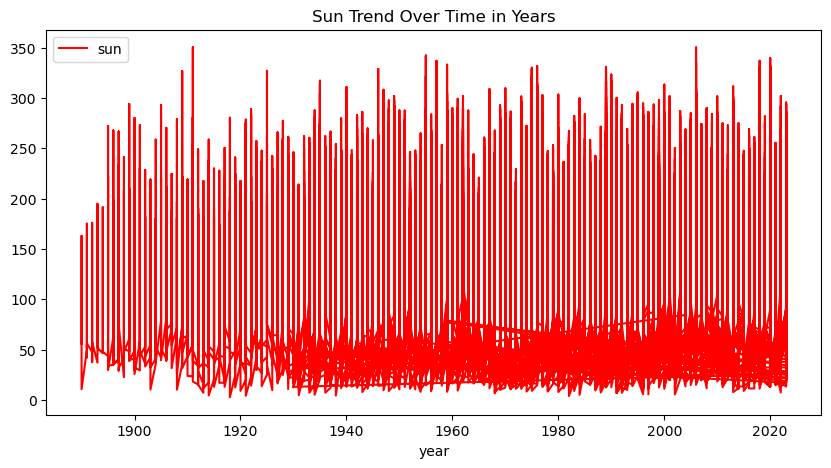

In [809]:
weather_station.plot(x ='year', y = 'sun', figsize=(10, 5), title= 'Sun Trend Over Time in Years', color='red')

<Axes: title={'center': 'Rain Trend Over Time in Years'}, xlabel='year'>

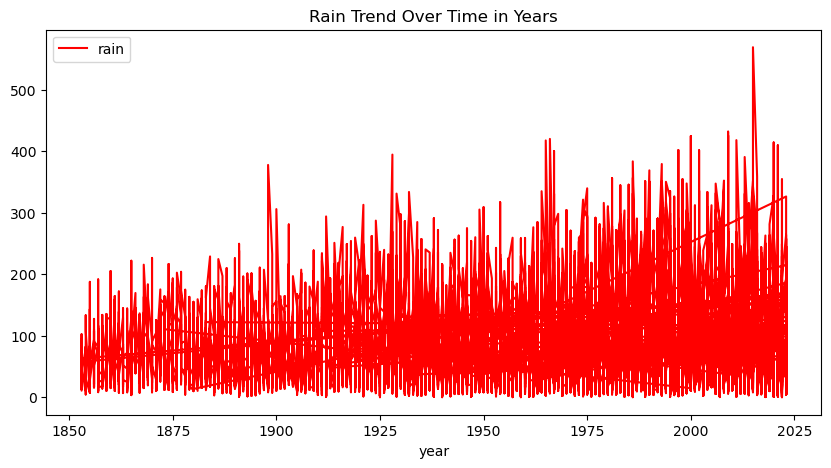

In [811]:
weather_station.plot(x ='year', y = 'rain', figsize=(10, 5), title= 'Rain Trend Over Time in Years',color='red')

<Axes: title={'center': 'Af Trend Over Time in Years'}, xlabel='year'>

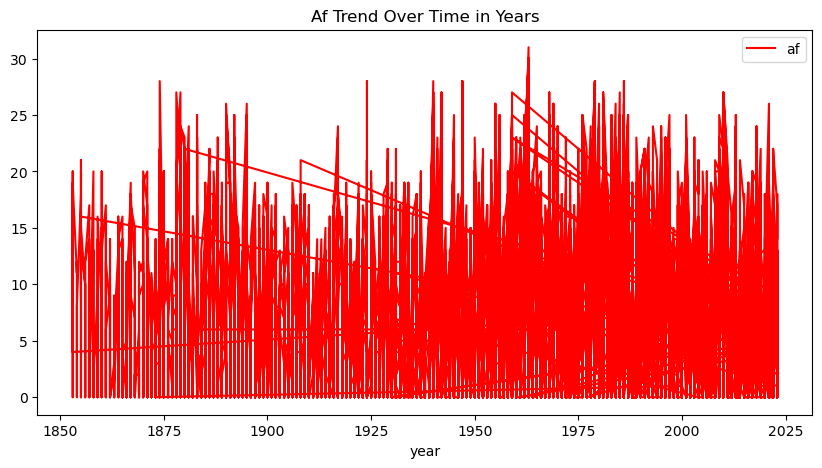

In [813]:
weather_station.plot(x ='year', y = 'af', figsize=(10, 5), title= 'Af Trend Over Time in Years', color='red')

**Let's look at seasonal decomposition**

In [898]:
monthly_aggregate = weather_station.groupby(['year', 'month'])['rain'].mean().reset_index()

C:\Users\emper\AppData\Local\Temp\ipykernel_16896\1108242388.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_aggregate = weather_station.groupby(['year', 'month'])['rain'].mean().reset_index()


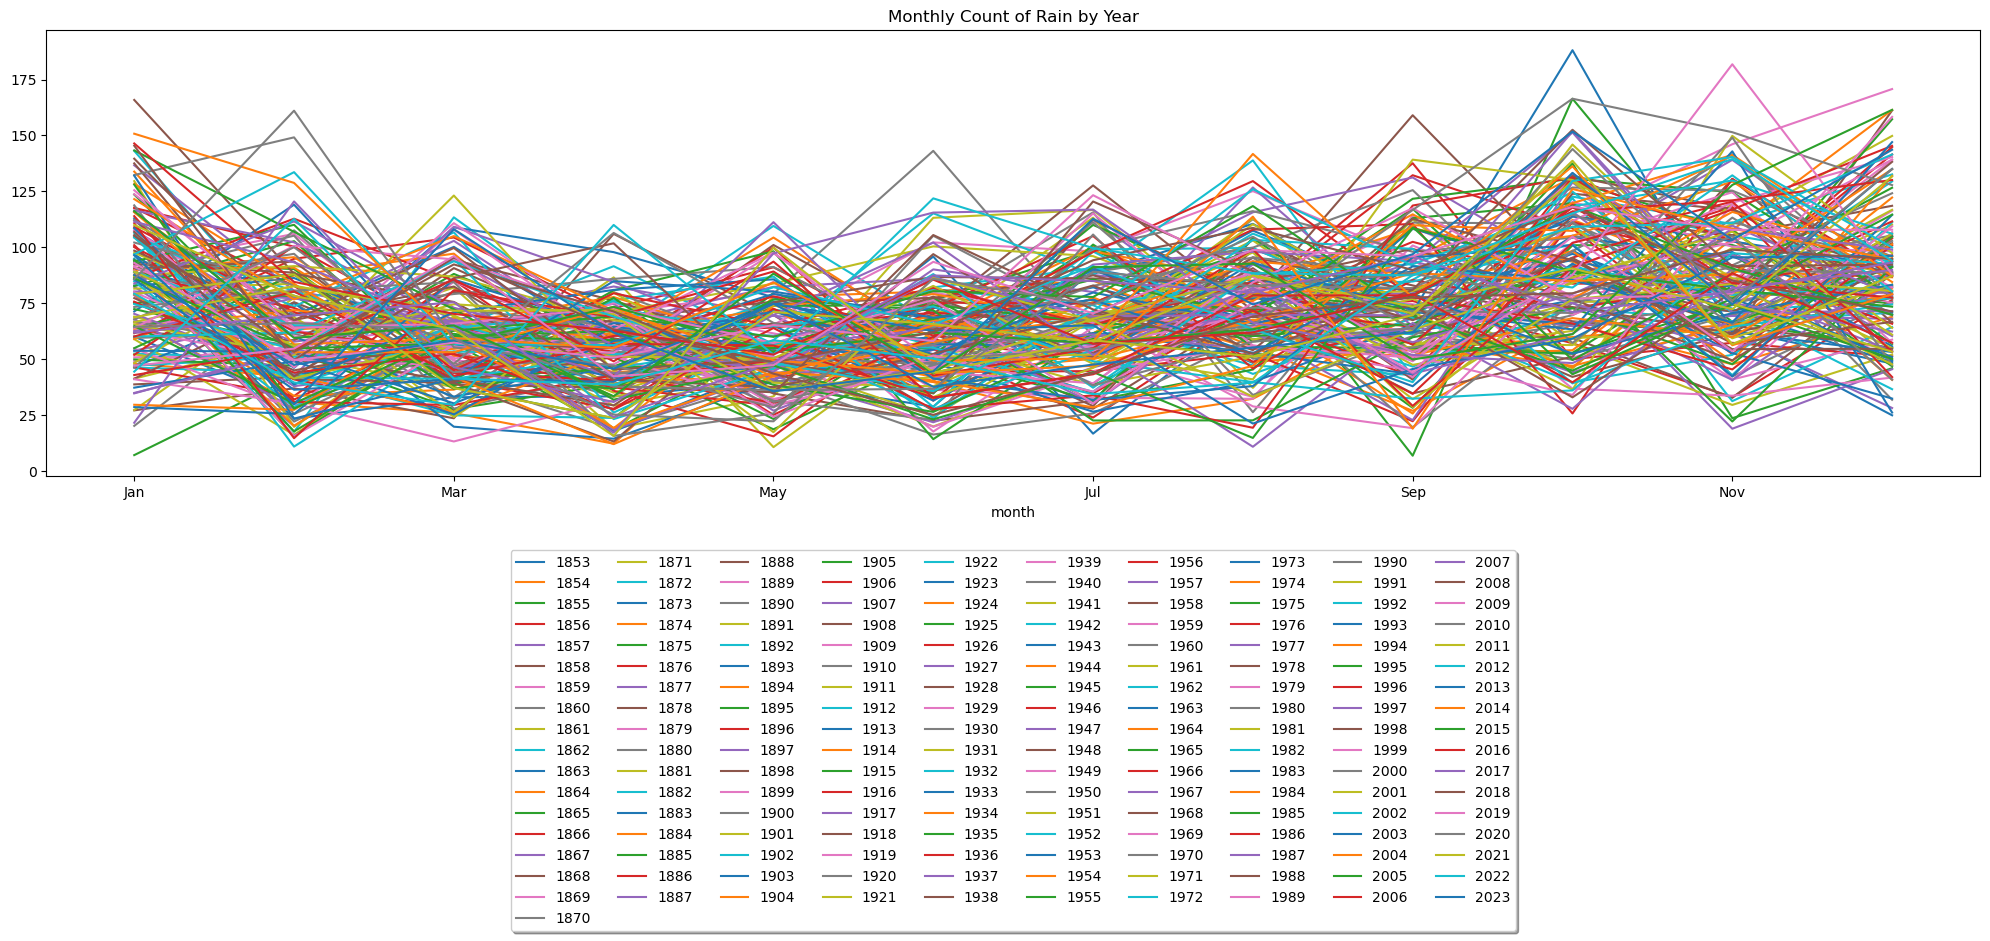

In [900]:
#Group by year and month, calculate average rainfall
#Pivot and plot
ax = monthly_aggregate.pivot(index='month', columns='year', values='rain').plot(
    figsize=(20, 10),
    title='Monthly Count of Rain by Year'
)
#Adjust the legend placement
ax.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=10,
    fancybox=True,
    shadow=True
)

plt.tight_layout()
plt.show()


In [905]:
monthly_aggregate = weather_station.groupby(['year', 'month'])['sun'].mean().reset_index()

C:\Users\emper\AppData\Local\Temp\ipykernel_16896\3656018108.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_aggregate = weather_station.groupby(['year', 'month'])['sun'].mean().reset_index()


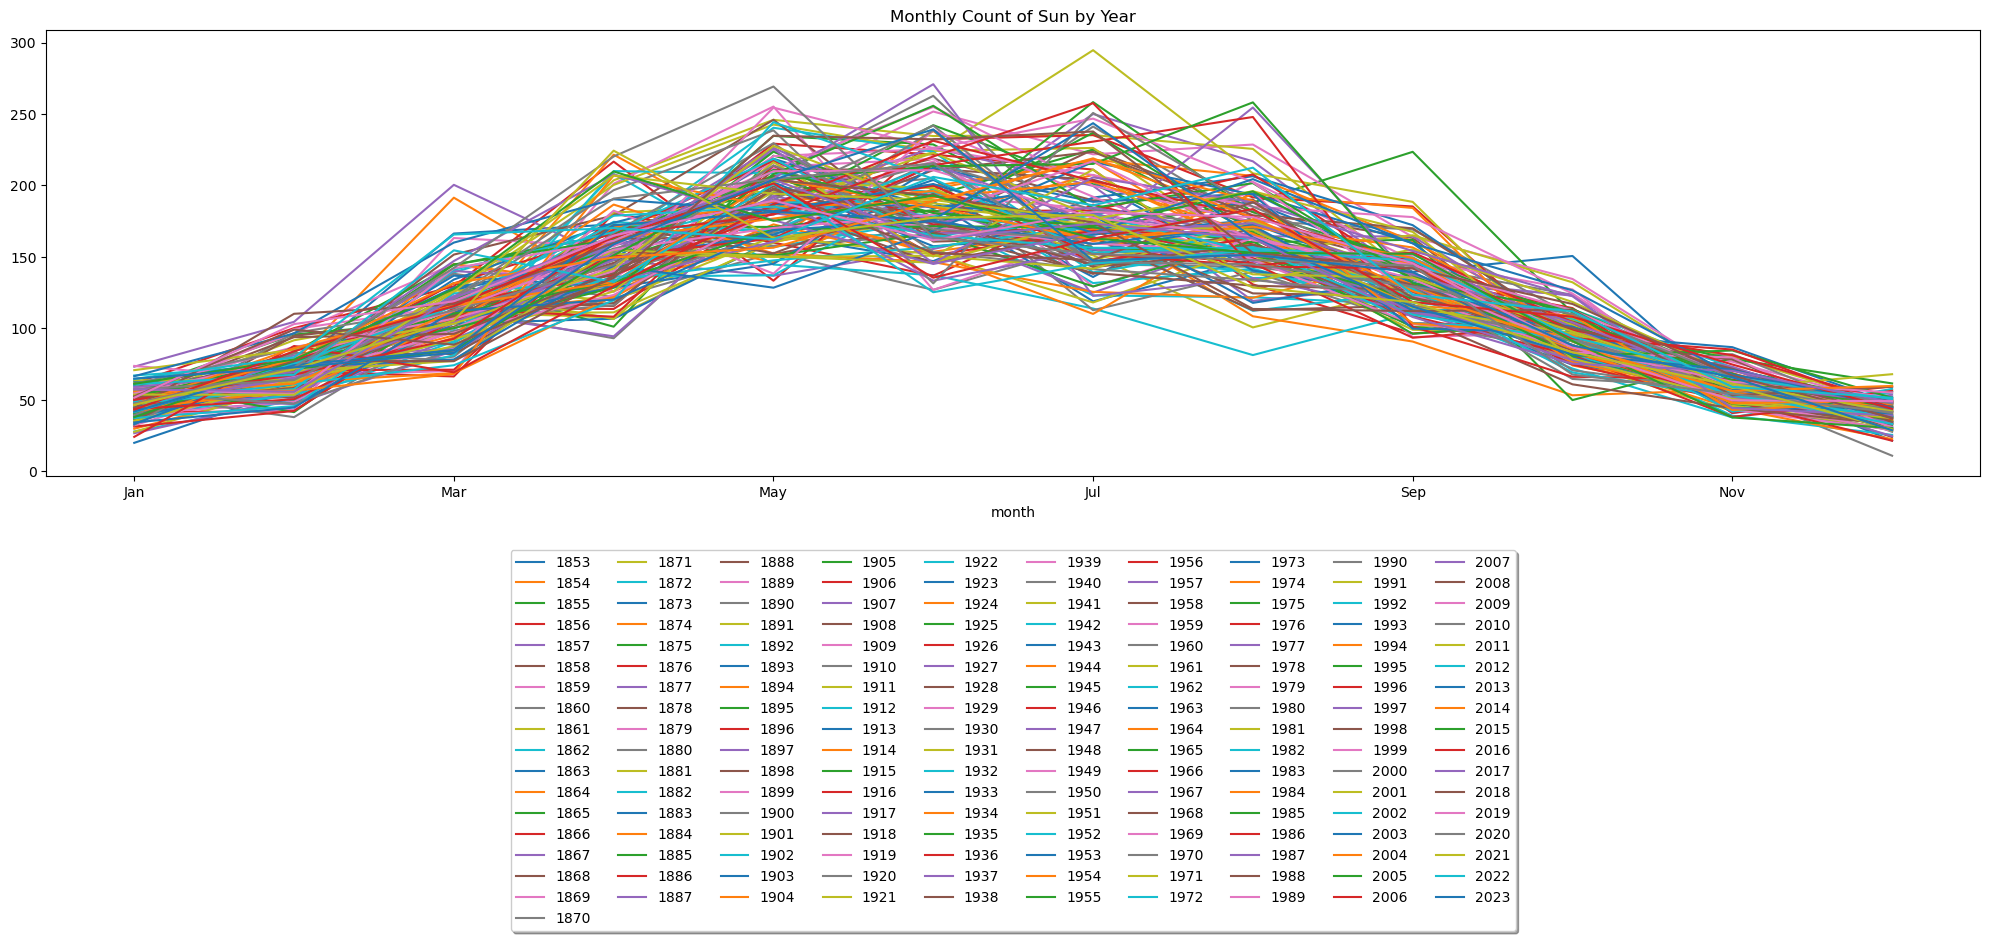

In [911]:
#Pivot and plot
ax = monthly_aggregate.pivot(index='month', columns='year', values='sun').plot(
    figsize=(20, 10),
    title='Monthly Count of Sun by Year'
)
#Adjust the legend placement
ax.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=10,
    fancybox=True,
    shadow=True
)

plt.tight_layout()
plt.show()


**Let's Focus on the Quantitative Variables Only - tmax, tmin, af, rain & sun**

In [441]:
key_columns= ["tmax", "tmin", "af", "rain", "sun"]

In [443]:
weather_station[key_columns].describe()

,tmax,tmin,af,rain,sun
count,38257.000000,38283.000000,36858.000000,38312.000000,29863.000000
mean,12.795598,5.979855,3.465001,73.224726,118.619958
std,5.050209,4.071049,5.166027,48.528718,63.393218
min,-0.900000,-8.600000,0.000000,0.000000,2.800000
25%,8.600000,2.700000,0.000000,39.200000,64.700000
50%,12.400000,5.600000,1.000000,62.800000,112.000000
75%,16.900000,9.500000,5.000000,95.500000,163.900000
max,28.300000,17.000000,31.000000,568.800000,350.300000


**Let's Do Some Plotting to Get Some Insights from the Data**

**Let's Plot the box plots for the key_columns**

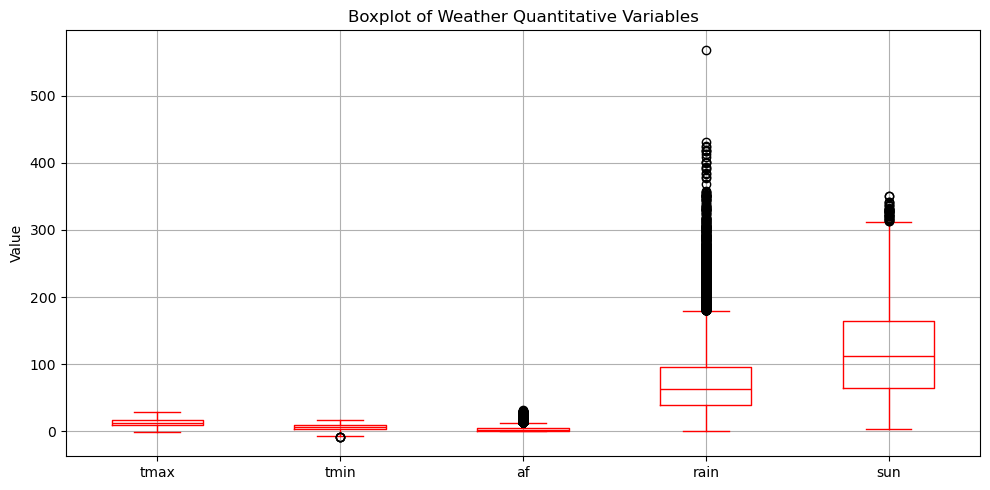

In [573]:
plt.figure(figsize=(10, 5))
box_plot_data.boxplot(column=key_columns, color='red')
plt.title("Boxplot of Weather Quantitative Variables")
plt.ylabel("Value")
plt.grid(True)
plt.tight_layout()
plt.show()

array([[<Axes: xlabel='tmax', ylabel='tmax'>,
        <Axes: xlabel='tmin', ylabel='tmax'>,
        <Axes: xlabel='af', ylabel='tmax'>,
        <Axes: xlabel='rain', ylabel='tmax'>,
        <Axes: xlabel='sun', ylabel='tmax'>],
       [<Axes: xlabel='tmax', ylabel='tmin'>,
        <Axes: xlabel='tmin', ylabel='tmin'>,
        <Axes: xlabel='af', ylabel='tmin'>,
        <Axes: xlabel='rain', ylabel='tmin'>,
        <Axes: xlabel='sun', ylabel='tmin'>],
       [<Axes: xlabel='tmax', ylabel='af'>,
        <Axes: xlabel='tmin', ylabel='af'>,
        <Axes: xlabel='af', ylabel='af'>,
        <Axes: xlabel='rain', ylabel='af'>,
        <Axes: xlabel='sun', ylabel='af'>],
       [<Axes: xlabel='tmax', ylabel='rain'>,
        <Axes: xlabel='tmin', ylabel='rain'>,
        <Axes: xlabel='af', ylabel='rain'>,
        <Axes: xlabel='rain', ylabel='rain'>,
        <Axes: xlabel='sun', ylabel='rain'>],
       [<Axes: xlabel='tmax', ylabel='sun'>,
        <Axes: xlabel='tmin', ylabel='sun'>,
        

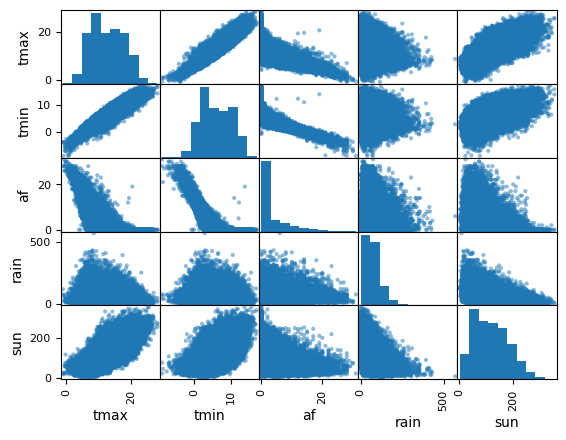

In [465]:
pd.plotting.scatter_matrix(weather_station[key_columns])

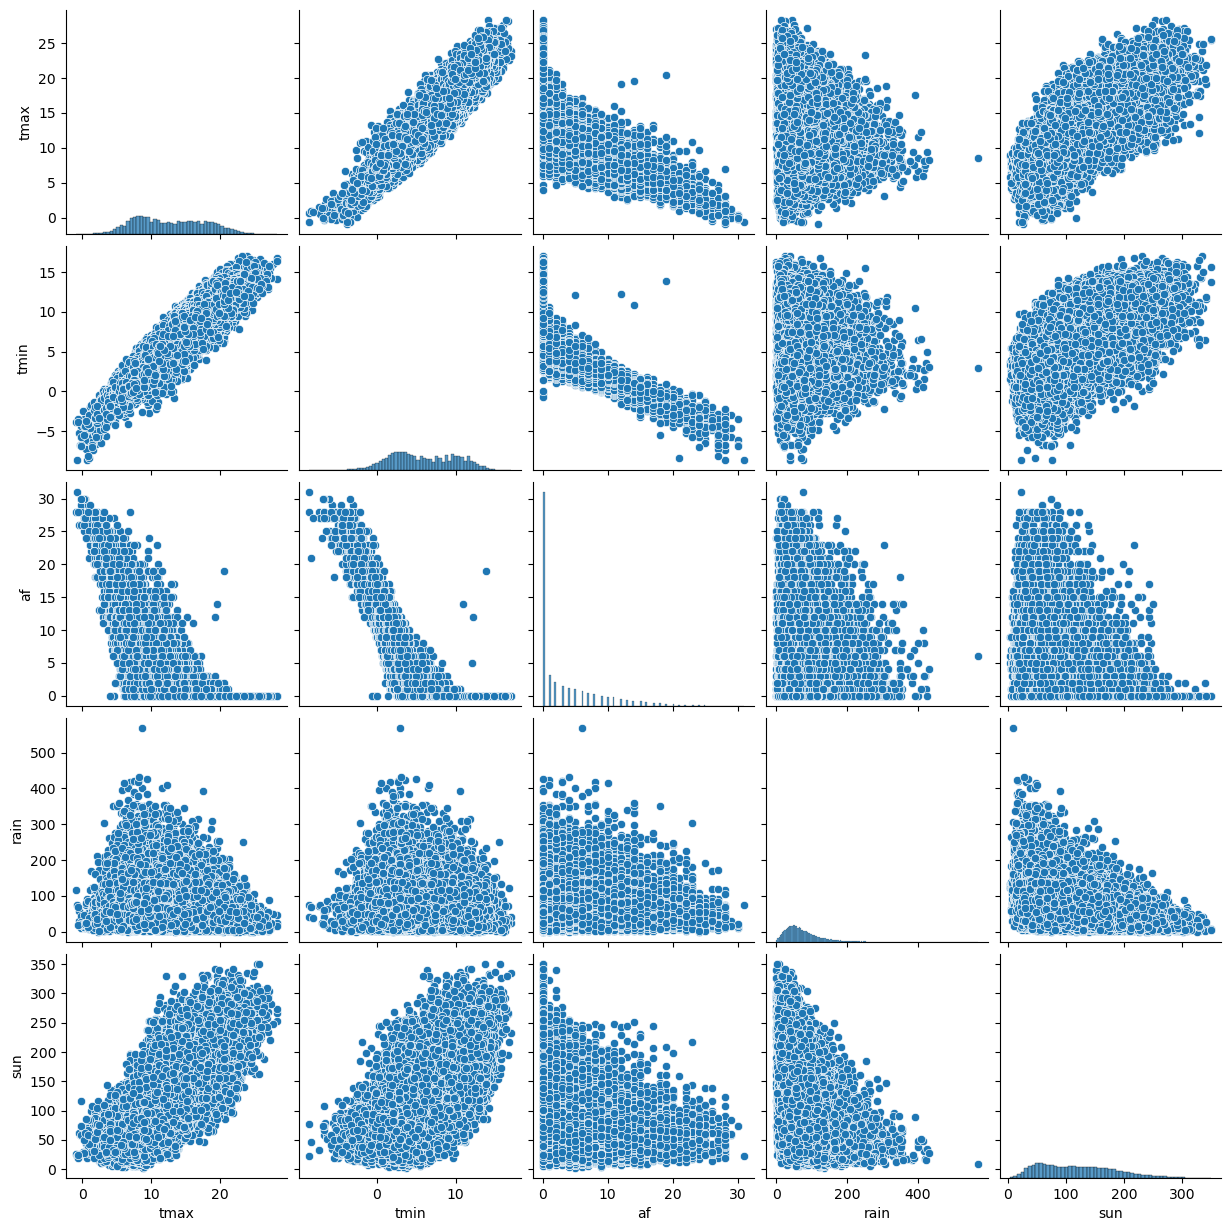

In [462]:
sns.pairplot(weather_station[key_columns])

<Axes: >

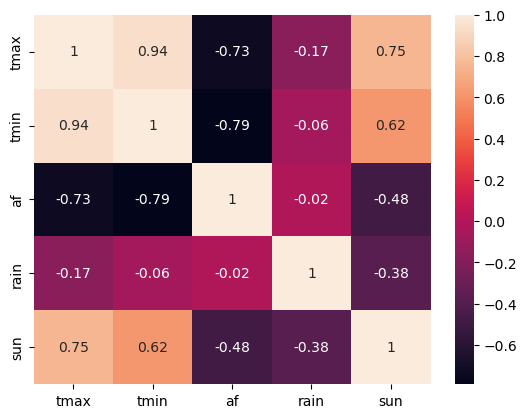

In [469]:
#Let's use Scatter Plot Heatmap to see the correlation index between the variables
correlation = weather_station[key_columns].corr().round(2)
sns.heatmap(correlation, annot = True)

**Let's Dive Deeper**

In [567]:
#First lets drop rows where the values for all the key cloumns are missing
#box_plot_data = weather_station[key_columns].dropna(how='all')
#box_plot_data

**Let's group by month**

In [766]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# Convert 'month' column to ordered categorical type
weather_station['month'] = pd.Categorical(
    weather_station['month'],
    categories=month_order,
    ordered=True)

C:\Users\emper\AppData\Local\Temp\ipykernel_16896\1732062019.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Group_by_month = weather_station.groupby('month')


<Axes: title={'center': 'Distribution of the Sum of tmax by Month'}, xlabel='month'>

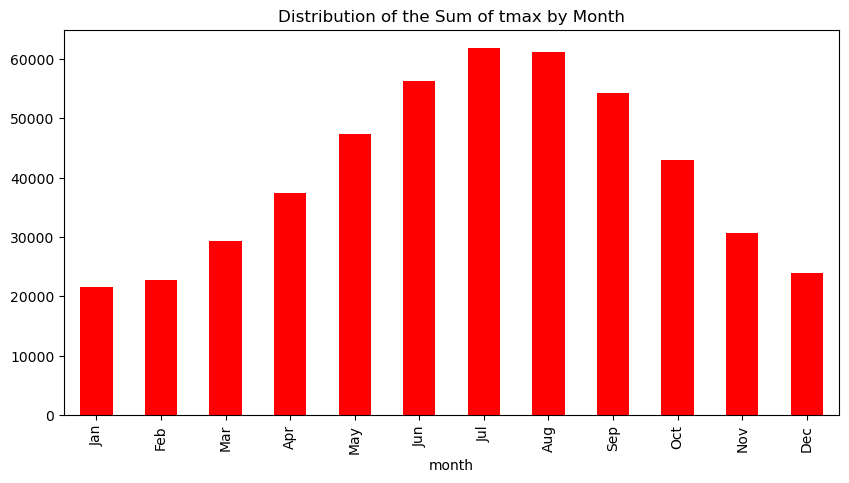

In [768]:
Group_by_month = weather_station.groupby('month')
Group_by_month['tmax'].sum()
Group_by_month['tmax'].sum().plot(kind= 'bar', title= 'Distribution of the Sum of tmax by Month', figsize = (10, 5), color ='red')

<Axes: title={'center': 'Distribution of the Sum of tmin by Month'}, xlabel='month'>

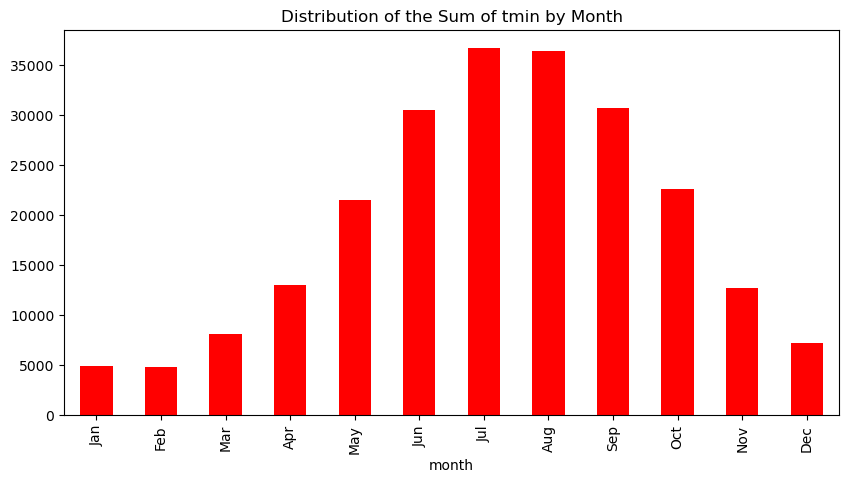

In [770]:
Group_by_month['tmin'].sum()
Group_by_month['tmin'].sum().plot(kind= 'bar', title= 'Distribution of the Sum of tmin by Month', figsize = (10, 5), color ='red')

<Axes: title={'center': 'Distribution of the Sum of af by Month'}, xlabel='month'>

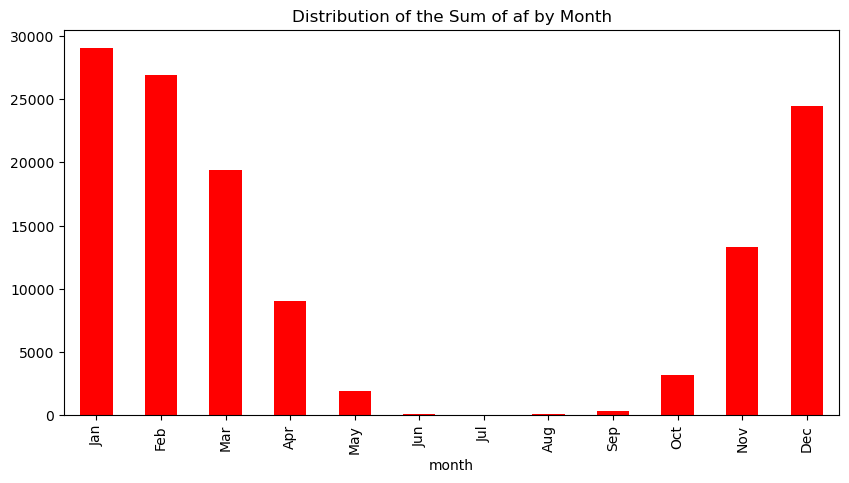

In [772]:
Group_by_month['af'].sum()
Group_by_month['af'].sum().plot(kind= 'bar', title= 'Distribution of the Sum of af by Month', figsize = (10, 5), color ='red')

<Axes: title={'center': 'Distribution of the Sum of Rain by Month'}, xlabel='month'>

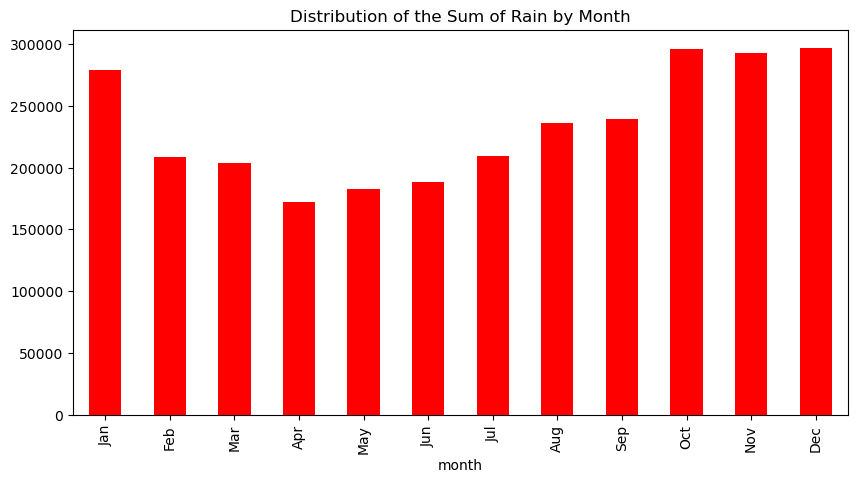

In [913]:
Group_by_month['rain'].sum()
Group_by_month['rain'].sum().plot(kind= 'bar', title= 'Distribution of the Sum of Rain by Month', figsize = (10, 5), color ='red')

<Axes: title={'center': 'Distribution of the Sum of Sun by Month'}, xlabel='month'>

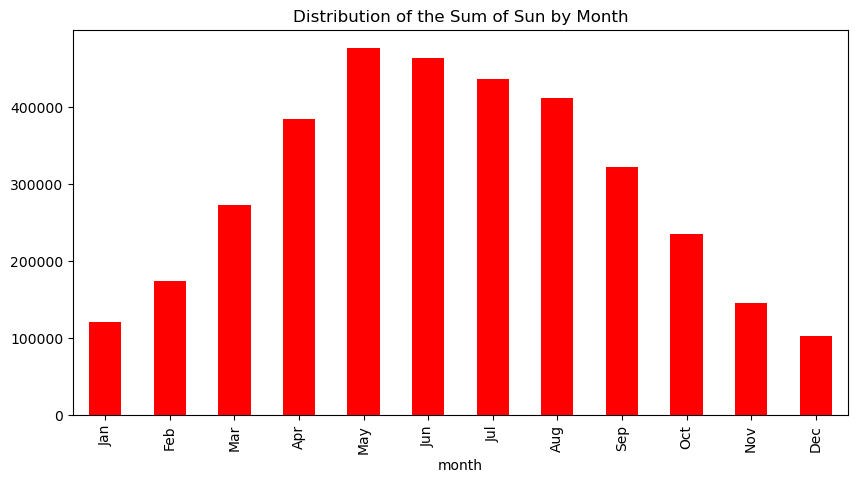

In [915]:
Group_by_month['sun'].sum()
Group_by_month['sun'].sum().plot(kind= 'bar', title= 'Distribution of the Sum of Sun by Month', figsize = (10, 5), color ='red')

**Let's group by station**

In [779]:
Group_by_station = weather_station.groupby('station')
Group_by_station['tmax'].sum()

station
aberporth          12226.7
armagh             24725.0
ballypatrick        8189.9
bradford           17076.3
braemar             8214.8
camborne            7355.7
cambridge          11214.2
cardiff             8201.0
chivenor            7910.1
cwmystwyth          6740.9
dunstaffnage        7586.0
durham             21476.1
eastbourne         10922.0
eskdalemuir        14492.8
heathrow           13681.6
hurn               11795.8
lerwick            10629.3
leuchars            9929.8
lowestoft          16571.4
manston            13399.1
nairn              13174.3
newtonrigg          9543.8
oxford             28703.0
paisley             9981.8
ringway             8769.0
rossonwye          15731.4
shawbury           10877.2
sheffield          21569.2
southampton        24942.2
stornoway          19886.4
suttonbonington    10754.9
tiree              13043.5
valley             14588.0
waddington         12304.6
whitby              9080.8
wickairport        13830.4
yeovilton          1

<Axes: title={'center': 'Distribution of the Sum of tmax by Station'}, xlabel='station'>

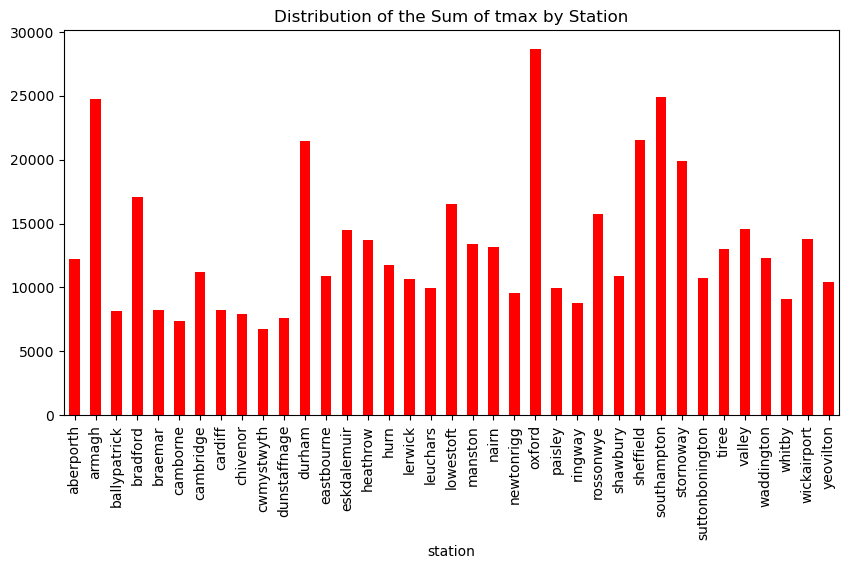

In [781]:
Group_by_station['tmax'].sum().plot(kind= 'bar', title= 'Distribution of the Sum of tmax by Station', figsize = (10, 5), color ='red')

In [783]:
Group_by_station['tmin'].sum()

station
aberporth           7153.6
armagh             10850.5
ballypatrick        3995.4
bradford            7961.2
braemar             2167.5
camborne            4597.8
cambridge           4881.4
cardiff             3957.1
chivenor            4267.7
cwmystwyth          2931.6
dunstaffnage        3860.0
durham              8462.7
eastbourne          6558.7
eskdalemuir         4582.5
heathrow            6519.1
hurn                4790.1
lerwick             5690.9
leuchars            4042.9
lowestoft           8639.5
manston             7036.4
nairn               5402.1
newtonrigg          3804.2
oxford             12815.5
paisley             4810.3
ringway             4134.4
rossonwye           7010.5
shawbury            4324.4
sheffield          10441.7
southampton        11740.2
stornoway           9705.0
suttonbonington     4646.6
tiree               7585.9
valley              8446.0
waddington          5563.5
whitby              4515.1
wickairport         6637.4
yeovilton           

<Axes: title={'center': 'Distribution of the Sum of tmin by Station'}, xlabel='station'>

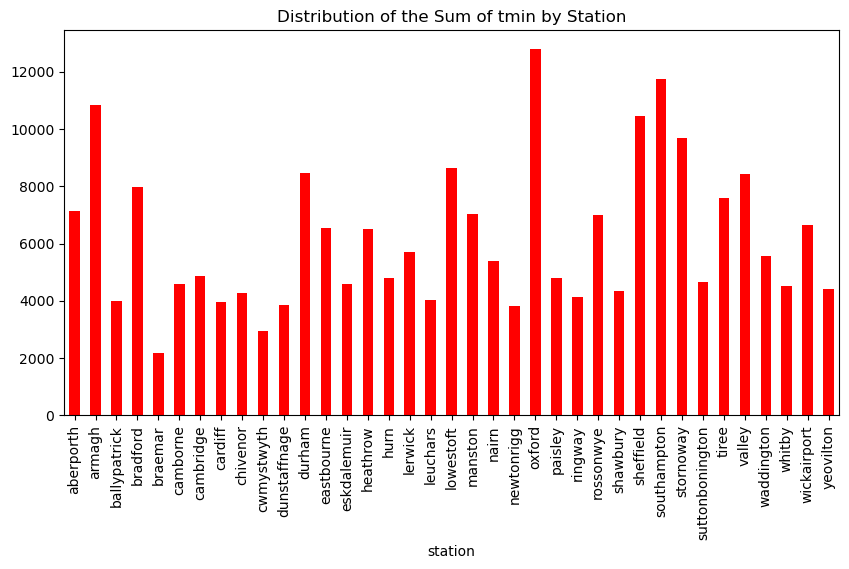

In [785]:
Group_by_station['tmin'].sum().plot(kind= 'bar', title= 'Distribution of the Sum of tmin by Station', figsize = (10, 5), color ='red')

In [786]:
Group_by_station['af'].sum()

station
aberporth          1200.0
armagh             6240.0
ballypatrick       1733.0
bradford           5157.0
braemar            6694.0
camborne            399.0
cambridge          2775.0
cardiff            1623.0
chivenor            753.0
cwmystwyth         3063.0
dunstaffnage       1459.0
durham             8187.0
eastbourne         1100.0
eskdalemuir        6023.0
heathrow           2621.0
hurn               3946.0
lerwick            3489.0
leuchars           3943.0
lowestoft          2823.0
manston            1704.0
nairn              4852.0
newtonrigg         3903.0
oxford             7582.0
paisley            2455.0
ringway            2360.0
rossonwye          4166.0
shawbury           3962.0
sheffield          4795.0
southampton        5437.0
stornoway          4946.0
suttonbonington    3077.0
tiree              1261.0
valley             1758.0
waddington         3240.0
whitby             1935.0
wickairport        3967.0
yeovilton          3085.0
Name: af, dtype: float64

<Axes: title={'center': 'Distribution of the Sum of af by Station'}, xlabel='station'>

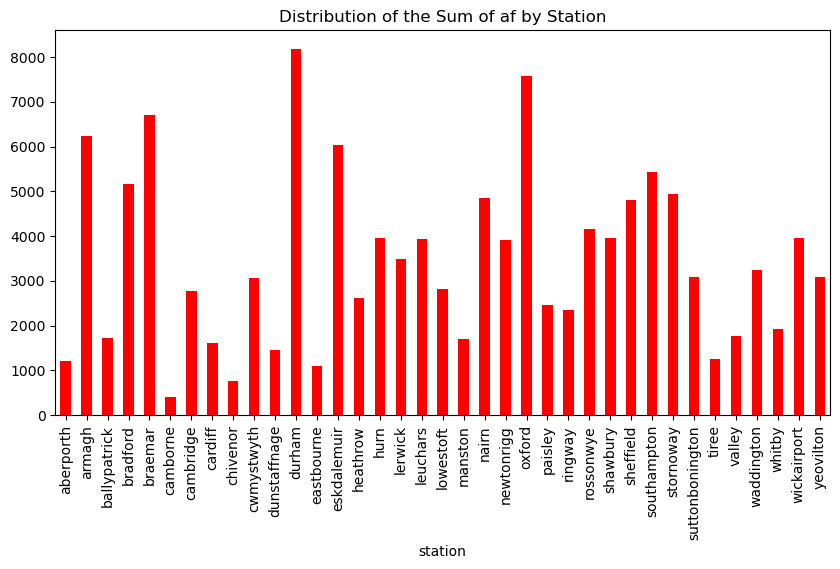

In [789]:
Group_by_station['af'].sum().plot(kind= 'bar', title= 'Distribution of the Sum of af by Station', figsize = (10, 5), color ='red')

In [790]:
Group_by_station['rain'].sum()

station
aberporth           75870.3
armagh             141341.0
ballypatrick        46167.7
bradford            98972.9
braemar             57135.5
camborne            48993.9
cambridge           35077.2
cardiff             54536.7
chivenor            58551.3
cwmystwyth          88165.3
dunstaffnage        85925.3
durham              94381.8
eastbourne          51787.3
eskdalemuir        183678.7
heathrow            46277.0
hurn                56481.9
lerwick            108219.3
leuchars            46194.3
lowestoft           62551.8
manston             47636.6
nairn               58811.0
newtonrigg          59932.5
oxford             112681.4
paisley             77701.4
ringway             35711.7
rossonwye           67332.8
shawbury            52348.8
sheffield          113464.6
southampton        115881.5
stornoway          181027.2
suttonbonington     38931.3
tiree              111199.3
valley              79566.6
waddington          46904.6
whitby              36705.2
wickairport 

<Axes: title={'center': 'Distribution of the Sum of Rain by Station'}, xlabel='station'>

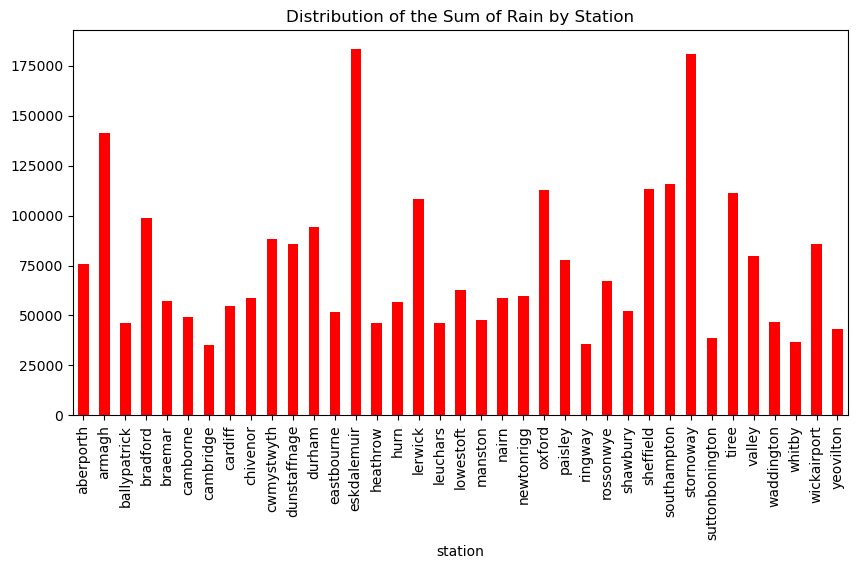

In [791]:
Group_by_station['rain'].sum().plot(kind= 'bar', title= 'Distribution of the Sum of Rain by Station', figsize = (10, 5), color ='red')

In [794]:
Group_by_station['sun'].sum()

station
aberporth          126326.4
armagh             117198.6
ballypatrick        32852.4
bradford           145375.3
braemar             54342.6
camborne            72022.1
cambridge           77250.0
cardiff             27553.0
chivenor            33124.0
cwmystwyth          56562.4
dunstaffnage        22579.5
durham             146785.7
eastbourne         120935.5
eskdalemuir        110946.5
heathrow           103697.5
hurn                92928.4
lerwick             99606.0
leuchars            99493.6
lowestoft          157267.7
manston            116862.4
nairn              118654.4
newtonrigg          29956.5
oxford             146836.3
paisley             83086.1
ringway             81066.4
rossonwye          138602.6
shawbury           107529.7
sheffield          127028.3
southampton        159734.0
stornoway          114605.5
suttonbonington     56308.2
tiree              135642.2
valley             148625.9
waddington         118296.1
whitby              40279.8
wickairport 

<Axes: title={'center': 'Distribution of the Sum of Sun by Station'}, xlabel='station'>

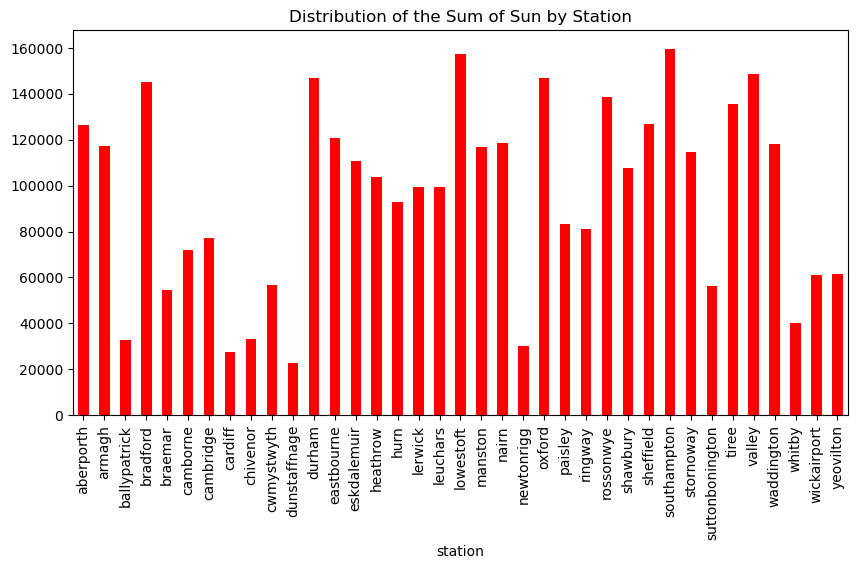

In [795]:
Group_by_station['sun'].sum().plot(kind= 'bar', title= 'Distribution of the Sum of Sun by Station', figsize = (10, 5), color ='red')

In [799]:
Group_by_Sun_Data_Source = weather_station.groupby('Sun_Data_Source')
Group_by_Sun_Data_Source['sun'].count()

Sun_Data_Source
Campbell Stokes    26435
Kipp & Zonen        3428
Missing                0
Name: sun, dtype: int64

<Axes: title={'center': 'Distribution of the Count of Sun by Data Source'}, xlabel='Sun_Data_Source'>

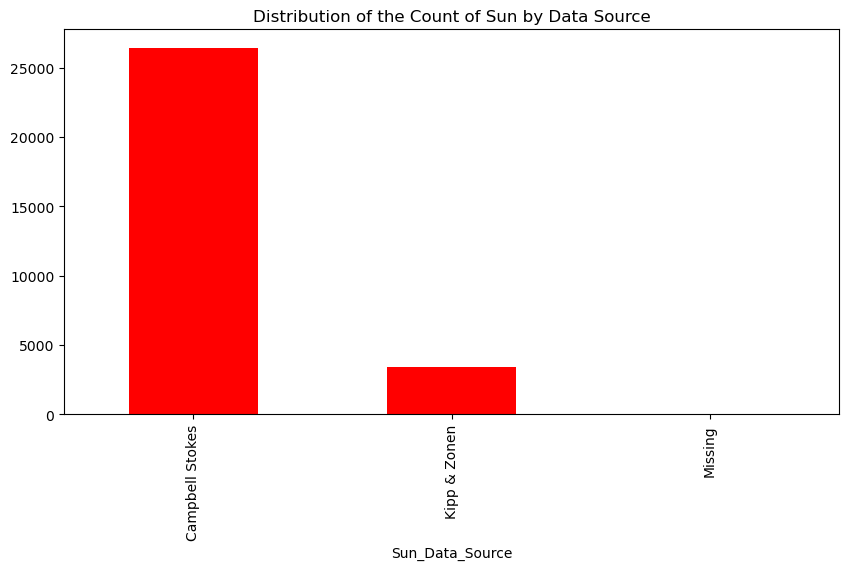

In [801]:

Group_by_Sun_Data_Source['sun'].count().plot(kind= 'bar', title= 'Distribution of the Count of Sun by Data Source', figsize = (10, 5), color ='red')